In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
data = pd.read_csv("ntrarogyaseva.csv")
data.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D


In [28]:
# print summary statistics
data.describe()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.000000,479688.000000,479688.000000,479688.000000
mean,239844.500000,44.912264,30428.941698,27652.205861
std,138474.142301,18.961084,27441.592281,25951.706037
min,1.000000,0.000000,5.000000,2.000000
25%,119922.750000,34.000000,12500.000000,12500.000000
50%,239844.500000,47.000000,25000.000000,23200.000000
75%,359766.250000,59.000000,35000.000000,30600.000000
max,479688.000000,107.000000,520000.000000,520000.000000


In [6]:
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

# Data Exploration


In [7]:
# Display the counts of each value in the SEX column
data['SEX'].value_counts()

Male             260718
Female           178947
Male(Child)       25068
Female(Child)     14925
FEMALE               21
MALE                  9
Name: SEX, dtype: int64

In [8]:
# mappings to standardize and clean the values
mappings = {'MALE' : 'Male', 'FEMALE' : 'Female', 'Male(Child)' : 'Boy', 'Female(Child)' : 'Girl'}
# replace values using the defined mappings
data['SEX'] = data['SEX'].replace(mappings)
data['SEX'].value_counts()

Male      260727
Female    178968
Boy        25068
Girl       14925
Name: SEX, dtype: int64

<AxesSubplot: >

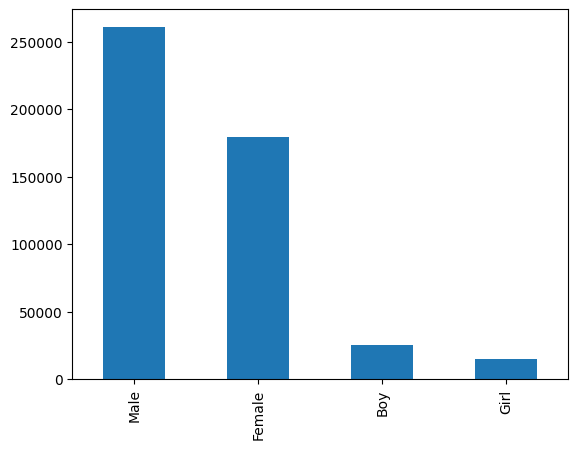

In [9]:
# plot the value counts of sex 
data['SEX'].value_counts().plot.bar()

In [10]:
# print the mean, median and mode of the age distribution
print("Mean: {}".format(data['AGE'].mean()))
print("Median: {}".format(data['AGE'].median()))
print("Mode: {}".format(data['AGE'].mode()))

Mean: 44.91226380480646
Median: 47.0
Mode: 0    0
Name: AGE, dtype: int64


In [11]:
# print the top 10 ages
data['AGE'].value_counts().head(10)

0     17513
50    16191
55    15184
45    15052
60    13732
46    12858
56    12590
51    12470
40    11962
65    11878
Name: AGE, dtype: int64

<AxesSubplot: >

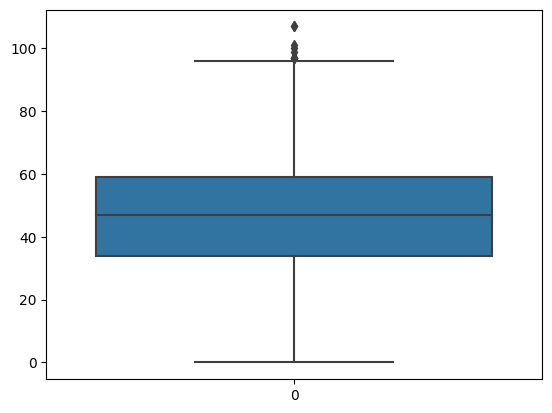

In [12]:
# better looking boxplot (using seaborn) for age variable
sns.boxplot(data['AGE'])

## Analyze Healthcare Data Deeply


In [13]:
# subset involving only records of Krishna district
data[data['DISTRICT_NAME']=='Krishna'].head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
30,31,42,Female,OC,S12,MEDICAL ONCOLOGY,S12.26.1,Chemotherapy for Acute Myeloid Leukemia with I...,Ward-1,Vijayawada,...,60000,Nims Hospitals,G,HYDERABAD,Hyderabad,06/08/2014 00:00:00,01/09/2014 00:00:00,NO,NaN,D
56,57,52,Male,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ward-26,Vijayawada,...,25000,OZONE HOSPITALS,C,HYDERABAD,Ranga Reddy,28/10/2014 00:00:00,06/11/2014 00:00:00,NO,NaN,D
58,59,17,Female,SC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.10.1,Mitral Valve Replacement (With Valve),Atapaka,Kaikalur,...,135000,Karumuri Hospital,C,GUNTUR,Guntur,04/11/2014 00:00:00,12/11/2014 00:00:00,NO,NaN,D
97,98,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,...,10000,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,08/04/2015 00:00:00,NaN,YES,03/05/2015 00:00:00,P
111,112,65,Male,OC,M7,NEUROLOGY,M7.4,Medical Management of Ischemic Strokes,Chilakalapudi (R),Machilipatnam,...,10000,Rims General Hospital,G,KADAPA,YSR Kadapa,28/05/2015 00:00:00,01/06/2015 00:00:00,NO,NaN,D


In [17]:
# Most common surgery by district
for i in data['DISTRICT_NAME'].unique():
    print("District: {}. Disease and Count: {}".format(i,data[data['DISTRICT_NAME']==i]['SURGERY'].value_counts().head(1)))

District: Srikakulam. Disease and Count: Maintenance Hemodialysis For Crf    3970
Name: SURGERY, dtype: int64
District: Kurnool. Disease and Count: Surgical Correction Of Longbone Fracture    2943
Name: SURGERY, dtype: int64
District: Vizianagaram. Disease and Count: Surgical Correction Of Longbone Fracture    2754
Name: SURGERY, dtype: int64
District: Guntur. Disease and Count: Surgical Correction Of Longbone Fracture    5259
Name: SURGERY, dtype: int64
District: Vishakhapatnam. Disease and Count: Maintenance Hemodialysis For Crf    5270
Name: SURGERY, dtype: int64
District: West Godavari. Disease and Count: Maintenance Hemodialysis For Crf    5478
Name: SURGERY, dtype: int64
District: Krishna. Disease and Count: Maintenance Hemodialysis For Crf    6026
Name: SURGERY, dtype: int64
District: East Godavari. Disease and Count: Surgical Correction Of Longbone Fracture    6998
Name: SURGERY, dtype: int64
District: Prakasam. Disease and Count: Maintenance Hemodialysis For Crf    6215
Name: 

In [19]:
for i in data['DISTRICT_NAME'].unique():
    print("District: {}. Average Claim Amount: {}".format(i,data[data['DISTRICT_NAME']==i]['CLAIM_AMOUNT'].mean()))

District: SrikakulamnAverage Claim Amount: 25593.712618634367
District: KurnoolnAverage Claim Amount: 28598.91853309593
District: VizianagaramnAverage Claim Amount: 25097.78006899492
District: GunturnAverage Claim Amount: 31048.73950729927
District: VishakhapatnamnAverage Claim Amount: 25977.94638304871
District: West GodavarinAverage Claim Amount: 27936.70608610806
District: KrishnanAverage Claim Amount: 31015.383233247547
District: East GodavarinAverage Claim Amount: 26166.136719737173
District: PrakasamnAverage Claim Amount: 28655.81036215859
District: NellorenAverage Claim Amount: 26105.122376744654
District: YSR KadapanAverage Claim Amount: 27945.216899192998
District: ChittoornAverage Claim Amount: 25708.102690948628
District: AnantapurnAverage Claim Amount: 27664.166978581827


In [25]:
# group by surgery category to get mean statistics
from unicodedata import numeric
data.groupby('CATEGORY_NAME')[['AGE', 'PREAUTH_AMT','CLAIM_AMOUNT']].mean(numeric_only=True)

,AGE,PREAUTH_AMT,CLAIM_AMOUNT
CATEGORY_NAME,,,
CARDIAC AND CARDIOTHORACIC SURGERY,51.764553,87052.165471,82487.123074
CARDIOLOGY,54.652048,33215.140211,26731.893660
COCHLEAR IMPLANT SURGERY,1.581081,520000.000000,516486.486486
CRITICAL CARE,51.014649,69927.226196,50185.150797
DERMATOLOGY,46.573171,28003.012195,21728.353659
ENDOCRINOLOGY,45.066667,18981.376471,14875.437255
ENT SURGERY,32.521940,15691.907198,14938.095612
GASTROENTEROLOGY,41.662383,37085.464601,23798.118922
GENERAL MEDICINE,35.330161,30347.573939,21840.991215


In [26]:
# group by surgery category to get mean statistics
from unicodedata import numeric
data.groupby('CATEGORY_NAME')[['AGE', 'PREAUTH_AMT','CLAIM_AMOUNT']].agg(["mean", "std"])

AGE               PREAUTH_AMT  \
                                          mean        std           mean   
CATEGORY_NAME                                                              
CARDIAC AND CARDIOTHORACIC SURGERY   51.764553  16.155904   87052.165471   
CARDIOLOGY                           54.652048  12.144893   33215.140211   
COCHLEAR IMPLANT SURGERY              1.581081   1.663523  520000.000000   
CRITICAL CARE                        51.014649  17.568701   69927.226196   
DERMATOLOGY                          46.573171  16.020073   28003.012195   
ENDOCRINOLOGY                        45.066667  17.718145   18981.376471   
ENT  SURGERY                         32.521940  13.808147   15691.907198   
GASTROENTEROLOGY                     41.662383  13.616744   37085.464601   
GENERAL MEDICINE                     35.330161  16.232155   30347.573939   
GENERAL SURGERY                      44.979473  16.751331   29818.585421   
GENITO URINARY SURGERIES             43.718295  15.708013   29426.211532   
GYNAECOLOGY AND OBSTETRICS  SURGERY  41.442323  13.027275   27614.600699   
INFECTIOUS DISEASES                  35.800000  13.809417   27970.000000   
MEDICAL ONCOLOGY                     48.545298  14.550454    7234.080290   
NEPHROLOGY                           48.011808  12.980504   14309.566173   
NEUROLOGY                            56.160018  13.993636   24547.013248   
NEUROSURGERY                         43.187689  16.691125   53718.705139   
OPHTHALMOLOGY  SURGERY               49.846924  16.759856   16474.566599   
ORTHOPEDIC  SURGERY AND PROCEDURES   36.967490  16.182789   27358.743536   
PEDIATRIC SURGERIES                   3.504840   4.299964   34134.385044   
PEDIATRICS                            1.413553   3.021871   29797.617781   
PLASTIC SURGERY                      27.419738  16.782857   61115.505351   
POLY TRAUMA                          46.256150  20.298744   32501.263044   
PROSTHESES                           48.500000   2.121320    1200.000000   
PULMONOLOGY                          51.937149  15.897331   32743.249244   
RADIATION ONCOLOGY                   51.835382  12.624481   33656.716935   
RHEUMATOLOGY                         29.392857  11.449051   28897.321429   
SURGICAL GASTRO ENTEROLOGY           44.645103  15.608083   64127.925427   
SURGICAL ONCOLOGY                    50.940826  13.657737   45243.913335   

                                                    CLAIM_AMOUNT                
                                              std           mean           std  
CATEGORY_NAME                                                                   
CARDIAC AND CARDIOTHORACIC SURGERY   34517.049346   82487.123074  34334.479422  
CARDIOLOGY                           14501.541317   26731.893660  12201.346001  
COCHLEAR IMPLANT SURGERY                 0.000000  516486.486486  16587.867528  
CRITICAL CARE                        18304.330776   50185.150797  18981.901544  
DERMATOLOGY                           3519.965251   21728.353659   6570.852919  
ENDOCRINOLOGY                         6499.820937   14875.437255   5725.604113  
ENT  SURGERY                          1798.461186   14938.095612   2189.496065  
GASTROENTEROLOGY                     22716.660560   23798.118922  11701.268930  
GENERAL MEDICINE                      9528.542450   21840.991215  11251.731021  
GENERAL SURGERY                       9723.007319   28142.764203   9794.580976  
GENITO URINARY SURGERIES             13232.894851   28709.646344  12937.544467  
GYNAECOLOGY AND OBSTETRICS  SURGERY   4464.338008   23180.202474   6035.068456  
INFECTIOUS DISEASES                      0.000000   24336.000000   3182.417320  
MEDICAL ONCOLOGY                      9575.984923    6819.998475   8887.793082  
NEPHROLOGY                            5720.986367   13524.963628   5558.208968  
NEUROLOGY                            11362.630134   19810.427139   8264.437009  
NEUROSURGERY                         20674.738284   49993.359806  18902

# regression

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [32]:
data_sub = data[['AGE', 'PREAUTH_AMT','CLAIM_AMOUNT']]

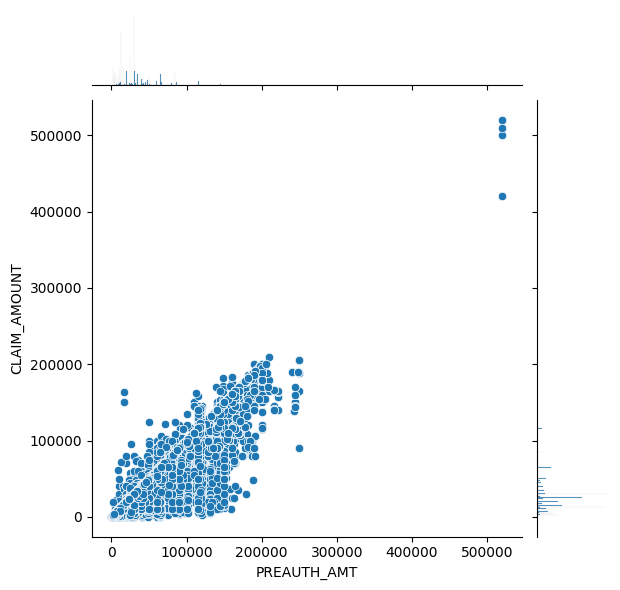

In [36]:
sns.jointplot(x='PREAUTH_AMT',y='CLAIM_AMOUNT', data=data_sub[[ 'PREAUTH_AMT','CLAIM_AMOUNT']])

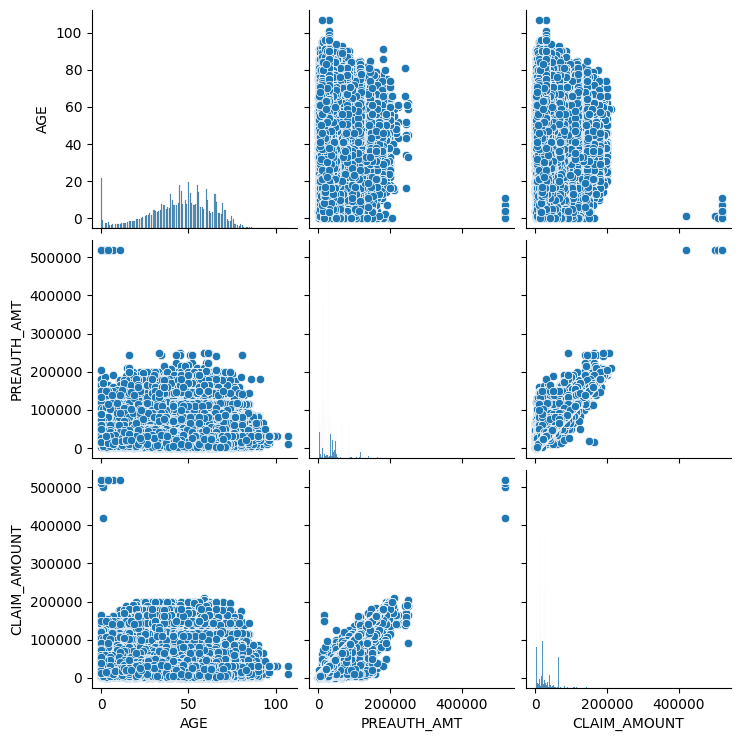

In [37]:
sns.pairplot(data=data_sub)

In [38]:
from sklearn.model_selection import train_test_split

In [44]:
Y=data_sub[ 'CLAIM_AMOUNT']
Y.head()

0    11000
1    11000
2    11500
3    11000
4    11000
Name: CLAIM_AMOUNT, dtype: int64

In [46]:
X=data_sub[['AGE','PREAUTH_AMT']]
X.head()

,AGE,PREAUTH_AMT
0,56,12500
1,37,12500
2,50,12500
3,45,12500
4,54,12500


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=101)

In [49]:
#Training the Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) # Creating an Instance of LinearRegression model
lm.fit(X_train,Y_train) # Train/fit on the trainingdata, this will give-

C:\Users\mgueye\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(n_jobs=1, normalize=False)

In [50]:
print(lm.coef_)

[26.7765417  0.9084005]


In [51]:
prediction = lm.predict(X_test)

In [54]:
from sklearn import metrics
print('MAE= ', metrics.mean_absolute_error(Y_test,prediction))
print('MSE= ', metrics.mean_squared_error(Y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE=  3834.619501121651
MSE=  54758054.07766426
RMSE: 7399.868517593016


(array([2.00000e+00, 0.00000e+00, 1.00000e+00, 7.40000e+01, 1.09945e+05,
        3.21970e+04, 1.27400e+03, 3.20000e+02, 7.30000e+01, 2.10000e+01]),
 array([-1.34515479e+05, -1.07587088e+05, -8.06586976e+04, -5.37303069e+04,
        -2.68019162e+04,  1.26474530e+02,  2.70548652e+04,  5.39832560e+04,
         8.09116467e+04,  1.07840037e+05,  1.34768428e+05]),
 <BarContainer object of 10 artists>)

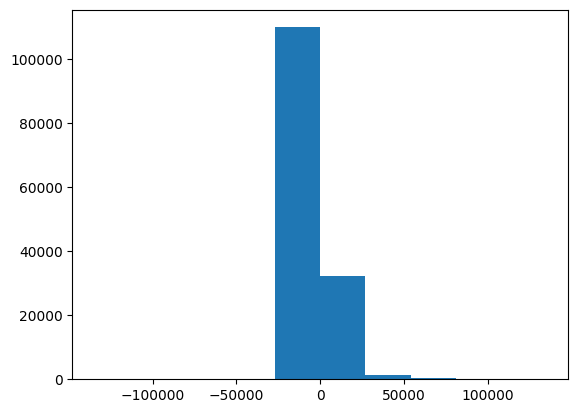

In [57]:
import matplotlib.pyplot as py
py.hist(prediction-Y_test)